In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text_data=['나는 내일 공부 해야지','내일 날씨는 좋을까','내일 어디를 가지','공부 집에서 해야지']

count_vectorizer=CountVectorizer()

count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

{'나는': 2, '내일': 4, '공부': 1, '해야지': 8, '날씨는': 3, '좋을까': 6, '어디를': 5, '가지': 0, '집에서': 7}


In [ ]:
sentence = [text_data[0]]
print(count_vectorizer.transform(sentence).toarray())

[[0 1 1 0 1 0 0 0 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [ ]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [ ]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

In [ ]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [ ]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

In [ ]:
vect = CountVectorizer(analyzer='char').fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [ ]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [ ]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


LookupError: ignored

In [ ]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

In [ ]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [ ]:
vect.transform(corpus).toarray().sum(axis = 0)

array([4, 2, 3, 3])

### DictVectorizer

In [ ]:
v = DictVectorizer(sparse=True)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
print(X)

  (0, 0)	1.0
  (0, 1)	2.0
  (1, 1)	3.0
  (1, 2)	1.0


In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [ ]:
v.feature_names_

['A', 'B', 'C']

In [ ]:
v.transform({'C':4, 'E':3})

array([[0., 0., 4.]])

## 희소행렬(Sparse Matrix)

### COO형식

dense = np.array([3,0,1], [0,2,0])

In [ ]:
from scipy import sparse
import numpy as np

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'scipy.sparse.coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


## CSR matrix

In [ ]:
from scipy.sparse import csr_matrix

indices = [0, 1, 2, 2, 3]
indptr = [0, 3, 4, 5]
data = [2, 4, 2, 1, 5]
m = csr_matrix((data, indices, indptr))
m.toarray()

array([[2, 4, 2, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 5]])

In [ ]:
from scipy.sparse import csr_matrix

indices = [1,2,3,2,0]
indptr = [0, 3, 4, 5]
data = [2, 4, 2, 1, 5]
m = csr_matrix((data, indices, indptr))
m.toarray()

array([[0, 2, 4, 2],
       [0, 0, 1, 0],
       [5, 0, 0, 0]])

### CSR 형식(Compressed sparse row)

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
def add_all(*args, **kwargs):
  sum = 0
  for i in args:
    sum += i

  print(kwargs['j'])
  return sum

In [ ]:
add_all(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, j = 50)

50


55

In [ ]:
def add_all(*kwargs):
  sum = 0
  for i in kwargs:
    sum += i
    
  # print(kwargs['j'])
  return sum

In [ ]:
add_all([1, 2, 3, 4, 5])

TypeError: ignored

In [ ]:
import pandas as pd
def doc(*args):
    doc_list = []
    df = pd.DataFrame()
    for i in args:
        # 단어 분해
        tmp_list = i.split(' ')
        # 리스트 결합
        doc_list += tmp_list
    doc_list = list(set(doc_list))
    for i in doc_list:
        tmp = []
        for j in args:
            # 단어 분해
            tmp_list = j.split(' ')
            # 단어 세기
            tmp.append(tmp_list.count(i))
        # 데이터 프레임 추가
        df[i] = tmp
    return df

In [ ]:
doc1  = 'I am a boy'
doc2 = 'I am a girl'
doc3 = 'I am a a a man'

In [ ]:
result = doc(doc1, doc2, doc3)
result

,am,girl,a,man,boy,I
0,1,0,1,0,1,1
1,1,1,1,0,0,1
2,1,0,3,1,0,1


In [ ]:
from urllib.request import urlretrieve
urlretrieve('http://doc.mindscale.kr/km/unstructured/review.gz','review.gz')

('review.gz', <http.client.HTTPMessage at 0x7fcdfde497d0>)

In [ ]:
df = pd.read_csv('review.gz')
df.head()

,reviewText,overall
0,They look good and stick good! I just don't li...,4
1,These stickers work like the review says they ...,5
2,These are awesome and make my phone look so st...,5
3,Item arrived in great time and was in perfect ...,4
4,"awesome! stays on, and looks great. can be use...",5


In [ ]:
df.loc[0,'reviewText'] #0행의 reviewText 열

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [ ]:
df['reviewText']

0         They look good and stick good! I just don't li...
1         These stickers work like the review says they ...
2         These are awesome and make my phone look so st...
3         Item arrived in great time and was in perfect ...
4         awesome! stays on, and looks great. can be use...
                                ...                        
194434    Works great just like my original one. I reall...
194435    Great product. Great packaging. High quality a...
194436    This is a great cable, just as good as the mor...
194437    I really like it becasue it works well with my...
194438    product as described, I have wasted a lot of m...
Name: reviewText, Length: 194439, dtype: object

In [ ]:
df['reviewText'].isna().sum()

99

In [ ]:
df.loc[548,'reviewText']

nan

In [ ]:
df.shape

(194439, 2)

In [ ]:
#dropna 메소드를 이용해 nan이 포함된 행을 모두 삭제한다.
df = df.dropna()

In [ ]:
df.shape

(194340, 2)

In [ ]:
df.isnull().sum()

reviewText    0
overall       0
dtype: int64

 ### DTM 만들기

In [246]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words = 'english')

In [247]:
#cv를 이용해서 DTM으로 변환
tdm = cv.fit_transform(df['reviewText'])

In [248]:
tdm.shape

(194340, 5000)

In [249]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000mah',
 '01',
 '02',
 '03',
 '04',
 '05',
 '09',
 '0a',
 '10',
 '100',
 '1000',
 '10000mah',
 '10004',
 '1020',
 '1080p',
 '10w',
 '11',
 '110',
 '12',
 '120',
 '12000mah',
 '12v',
 '13',
 '14',
 '15',
 '150',
 '1520',
 '1575',
 '16',
 '1604',
 '16gb',
 '17',
 '18',
 '180',
 '19',
 '1900',
 '1a',
 '1amp',
 '1mm',
 '1st',
 '20',
 '200',
 '2000',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '21',
 '2100',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '2600',
 '2600mah',
 '27',
 '28',
 '29',
 '2a',
 '2amp',
 '2g',
 '2gb',
 '2mm',
 '2nd',
 '2x',
 '30',
 '300',
 '3000',
 '3000mah',
 '31',
 '32',
 '32gb',
 '33',
 '34',
 '35',
 '36',
 '360',
 '39',
 '3d',
 '3g',
 '3gs',
 '3m',
 '3rd',
 '3x',
 '40',
 '400',
 '45',
 '48',
 '49',
 '4a',
 '4g',
 '4s',
 '4th',
 '50',
 '500',
 '5000',
 '5000mah',
 '500ma',
 '510',
 '520',
 '5200',
 '5200mah',
 '521',
 '55',
 '5600mah',
 '59',
 '5a',
 '5c',
 '5mm',
 '5mp',
 '5s',
 '5th',
 '5v',
 '60',
 '600',
 '6000mah',
 '62',
 '

- 다른 방법을 지정해주지 않으면 CountVectorizer 는 숫자든 문자든 가리지 않고 공백만으로 단어를 구별한다. 숫자를 제거해주는 것도 가능하지만 자주 나오는 숫자들은 모델명 등 특별히 의미가있는 숫자인 경우도 있기 때문에 잘 생각해보고 결정해야 한다.
- 이 단어 목록은 앞으로 자주 쓰게 되므로 words 라는 변수에 따로 할당을 해두도록 하자.

In [250]:
words = cv.get_feature_names()

- tdm에서 첫 문서의 정보를 보면 Compressed Sparse Row format라는 표현이 나온다. 단어 문서 행렬을 대부분의 값이 0이다. sparse라는 단어는 '희박한'이라는 뜻으로 이렇게 대부분이 0인행렬을 가리킨다. 이런 희박 행렬을 다룰 때는 메모리를 절약하기 위해 압축된(Compressed) 형식을 사용한다. 그래서 내용을 바로 확인할 수는 없다

In [251]:
tdm[0]

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

- 내용을 확인하려면 압축을 풀어주어야 한다. 이렇게 보면 대부분의 값이 0인 것을 볼 수 있다

In [252]:
doc = tdm[0].toarray()
doc

array([[0, 0, 0, ..., 0, 0, 0]])

In [253]:
doc[0][10]

0

In [254]:
count = tdm.sum(axis=0)

In [255]:
count.shape

(1, 5000)

In [256]:
word_count = list(zip(words, count.flat))

In [ ]:
word_count

In [258]:
import operator
# 정렬해보면, 
word_order = sorted(
    word_count,
    key = operator.itemgetter(1), #0이면 단어순, 1이면 빈도순
    reverse = True                # 내림차순(역순)으로 정렬한다.
)

- 가장 많이 사용된 10개 단어를 확인한다.

In [259]:
word_order[:10]

[('phone', 181717),
 ('case', 150035),
 ('like', 74073),
 ('great', 68898),
 ('use', 63229),
 ('screen', 62373),
 ('just', 61980),
 ('good', 60355),
 ('battery', 59361),
 ('iphone', 49758)]

- wordcloud
 - 먼저 윈도에서는 Unofficial Windows Binaries for Python Extension Packages에서wordcloud-1.3.3-cpXX-cpXXm-win_amdXX.whl를 자신의 Python 버전과 운영체제 bit에맞게 다운로드한 후, 다운로드 폴더에서 명령창을 열어 아래 명령을 입력한다.



```
pip install wordcloud-1.3.3-cpXX-cpXXm-win_amdXX.whl
```



In [260]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


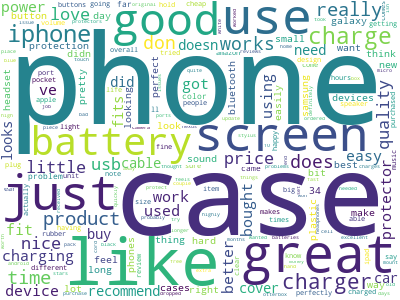

In [261]:
from wordcloud import WordCloud
%matplotlib inline
#배경색 흰색, 가로 400픽셀, 세로 300픽셀의 그림을 설정.
wc = WordCloud(background_color='white', width=400, height=300)
#word_count를 위의 설정의 그림으로 변환하여 cloud 변수에 할당한다.
cloud = wc.fit_words(dict(word_count))
#dict으로 처리한 이유 : https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
#cloud 변수의 그림을 노트북에 붙여 넣으려면 아래와 같이 함.
cloud.to_image()

파이썬으로 TF-IDF 직접 구현하기



In [262]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [265]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [293]:
#TF,IDF 그리고 TF-IDF 값을 구하는 함수
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
        # print(df)
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [294]:
#TF를 구해보자. ->DTM을 데이터프레임에 저장하여 출력

result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    # print(result)
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        # print('t : ', t)
        # print('d : ', d)
        # print('tf(t,d) : ', tf(t,d))
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [295]:
#정상적인 DTM이 출력되어짐. 이제 각 단어에 대한 IDF 값을 구해보자

result = []
for j in range(len(vocab)):
    t = vocab[j]
    # print(idf(t))
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [296]:
#TF-IDF 행렬을 출력

result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


#  실습 : 20 Newsgroup 분류하기

188846개의 뉴스 20개의 뉴스 카테고리로 분류하기.

1. 텍스트 정규화
2. 피처 벡터화
3. 머신러닝 학습/예측/평가
4. Pipeline 적용
5. GridSearch 최적화

In [283]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset = 'all', random_state = 42)

In [284]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [285]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [286]:
print(news_data.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [287]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


Count 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

**주의 : 학습 데이터에 대해 fit()된 CountVectorizer 를 이용해서 테스트 데이터를 피처 벡터화 해야함.
테스트 데이터에서 다시 CountVecotrizer의 fit_trainform()을 수행하거나 fit()을 수행 하면 안됨.
이는 이렇게 테스트 데이터에서 fit()을 수행하게 되면 기존 학습된 모델에서 가지는 feature의 갯수가 달라지기 때문.

In [288]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train , y_train) #cnt_ect.fit_transform(X_train,y_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.608


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [292]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

print(X_train_tfidf_vect)


# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

  (0, 100208)	0.08685616308783167
  (0, 96917)	0.08926797424363729
  (0, 96683)	0.058889213455469325
  (0, 96391)	0.05597120975997526
  (0, 93870)	0.07867725240999558
  (0, 92875)	0.07869746134747452
  (0, 89360)	0.031298194014652475
  (0, 88587)	0.07030440409722899
  (0, 88532)	0.1142555926111997
  (0, 88519)	0.03740880352991577
  (0, 87099)	0.16847559471851006
  (0, 81774)	0.11898817557792947
  (0, 73151)	0.10698124508534598
  (0, 68102)	0.055076735882557376
  (0, 67683)	0.08358612436816312
  (0, 66511)	0.09197367963420514
  (0, 66242)	0.05960561961640993
  (0, 64435)	0.16877440456529577
  (0, 58962)	0.11122356168600585
  (0, 58921)	0.11561594777840019
  (0, 56936)	0.1394734886832555
  (0, 51326)	0.03701026691275461
  (0, 51136)	0.10743312076706532
  (0, 50300)	0.2809690056092405
  (0, 49447)	0.03554330344293277
  :	:
  (11313, 34487)	0.11476854187266004
  (11313, 34017)	0.10464005174646668
  (11313, 33551)	0.0563239603375948
  (11313, 32493)	0.12856449502207912
  (11313, 31051)	0.07

In [291]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))